<a href="https://colab.research.google.com/github/yeong0000/Python/blob/main/py16_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [1]:
import numpy as np # ndarray
import pandas as pd # Series, DataFrame
import matplotlib.pyplot as plt # 시각화(그래프)
import seaborn as sns # 시각화, 예제 데이터

# 데이터 셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info() # 데이터프레임의 정보 - 타입, 행 인덱스, 컬럼 정보, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## matplotlib.pyplot 모듈을 사용한 시각화

1. `figure` 객체 생성
2. `figure` 객체에 subplot(axis)을 생성해서 추가.
3. subplot에 그래프 그림.
4. 그래의 여러가지 옵션들을 설정
5. 그래프 보여주기

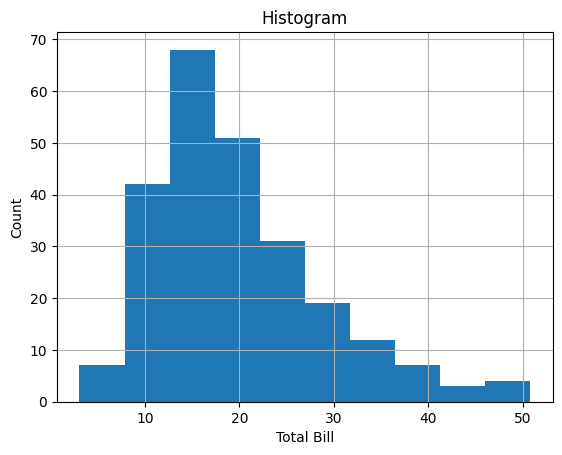

In [5]:
# 1. figure 객체 생성
figure = plt.figure()

# 2. 생성된 figure 객체에 subplot(axis)을 추가
# axis = figure.add_subplot(1,1,1) # row, column, index
axis = figure.add_subplot(111)

# 3. subplot에 그래프 종류를 선택해서 그림
axis.hist(x=tips['total_bill'])

# 4. 그래의 옵션 설정
axis.set_xlabel('Total Bill')
axis.set_ylabel('Count')
axis.set_title('Histogram')
axis.grid()

# 5. 그래프 보여주기
plt.show()

figure에 두개의 subplot을 상하로 배치하고 그래프 그리기

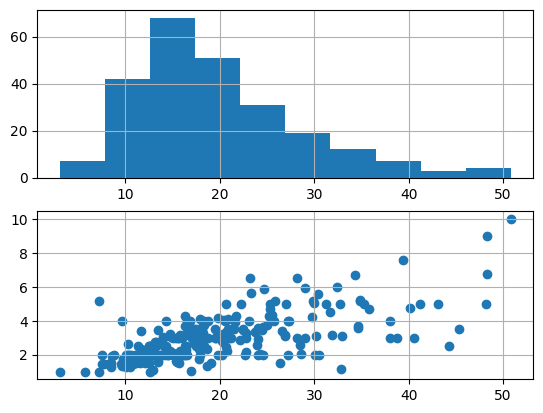

In [6]:
# 1. figure 생성
fig = plt.figure()

# 2. subplot을 figure에 추가
ax1 = fig.add_subplot(2,1,1) # add_subplot(211)
ax2 = fig.add_subplot(2,1,2) # add_subplot(212)

# 3. 그래프
ax1.hist(x=tips.total_bill)
ax2.scatter(x=tips.total_bill, y=tips.tip)

# 4. 옵션
ax1.grid()
ax2.grid()

# 5. 보여주기
plt.show()

figure에 2개의 subplot 좌우로 배치하고 hist, scatter 그래프 그리기

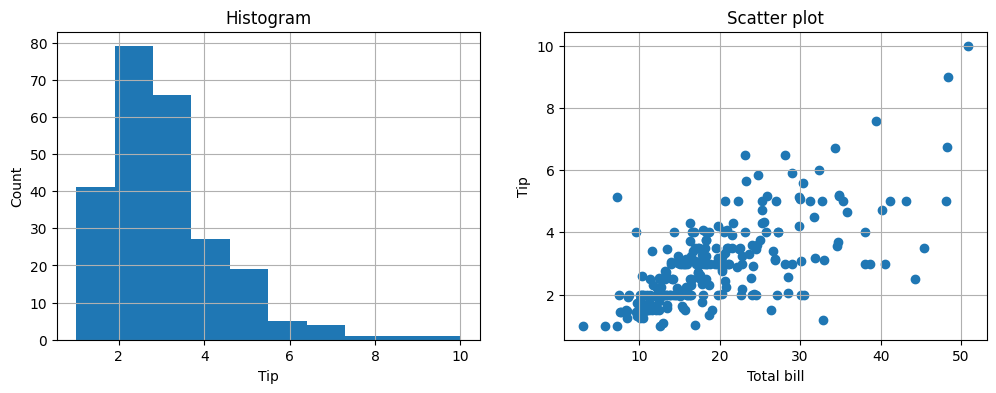

In [7]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2,1) # add_subplot(121)
ax2 = fig.add_subplot(1,2,2) # add_subplot(122)

ax1.hist(x=tips.tip)
ax2.scatter(x=tips.total_bill, y=tips.tip)

ax1.grid()
ax1.set_xlabel('Tip')
ax1.set_ylabel('Count')
ax1.set_title('Histogram')

ax2.grid()
ax2.set_xlabel('Total bill')
ax2.set_ylabel('Tip')
ax2.set_title('Scatter plot')

plt.show()

# `pli.subplots()` 함수

figure 생성 + subplot 추가

## figure 1개의 subplot이 있는 경우

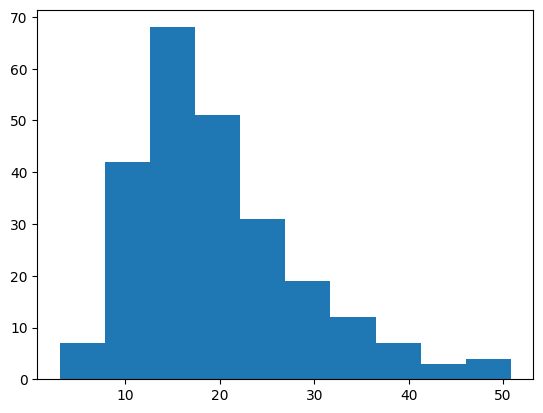

In [8]:
# figure 생성, figure에 subplot을 추가.
fig, ax = plt.subplots()

# subplot에 그래프 그림.
ax.hist(x=tips.total_bill)

# 옵션

# 그래프 보여주기
plt.show()

## subplot 2개를 상하로 배치

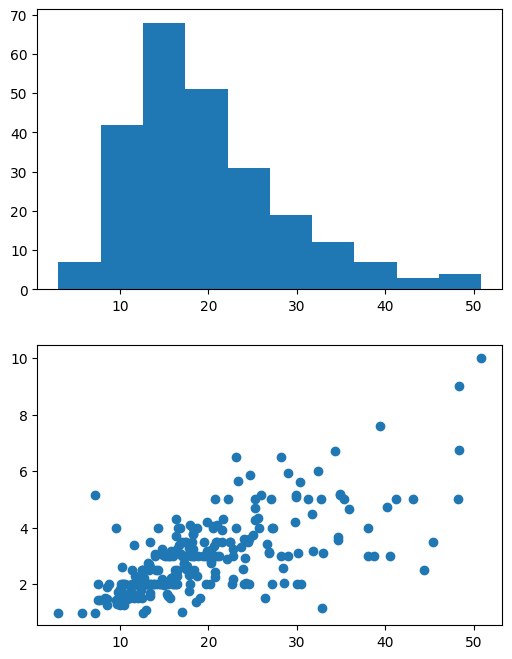

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(6,8))
# print(ax) # subplot이 2개 이상인 경우 리턴 값 ax는 subplot들의 배열(ndarray)

ax[0].hist(x=tips.total_bill)
ax[1].scatter(x=tips.total_bill, y=tips.tip)

plt.show()

## 2개의 subplot을 좌우로 배치

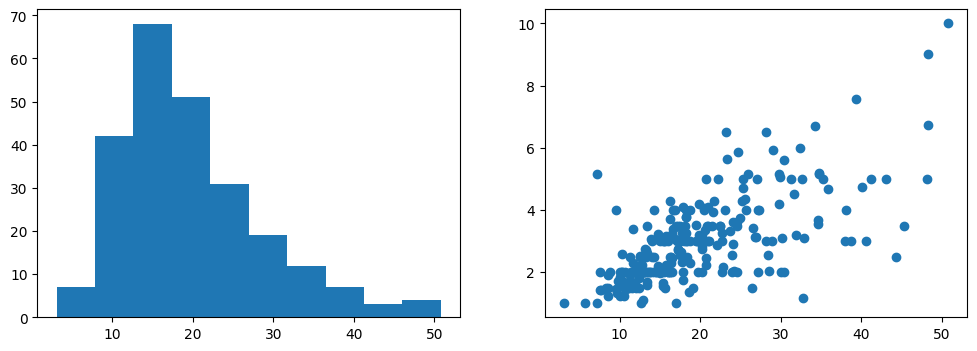

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
# print(ax)

ax[0].hist(x=tips.total_bill)
ax[1].scatter(x=tips.total_bill, y=tips.tip)

plt.show()

# `pyplot` 모듈의 top-level 함수

figure 생성 + subplot 1개 생성 + 그래프 종류

## Histogram

* 연속형 변수를 구간으로 나눠서, 그 구간 안에 포함된 자료의 개수를 막대의 높이로 표현한 그래프.
* 연속형 변수의 분포를 알 수 있음.

hist 함수 파라미터:

* x: x축에 사용할 변수 이름. 히스토그램을 그리기 위한 자료.
* bins: 막대 개수, 구간
* color: 막대 안쪽을 채우는 색깔
* edgecolor: 막대 테두리 색깔
* density: False - 개수, True - 밀도(비율)

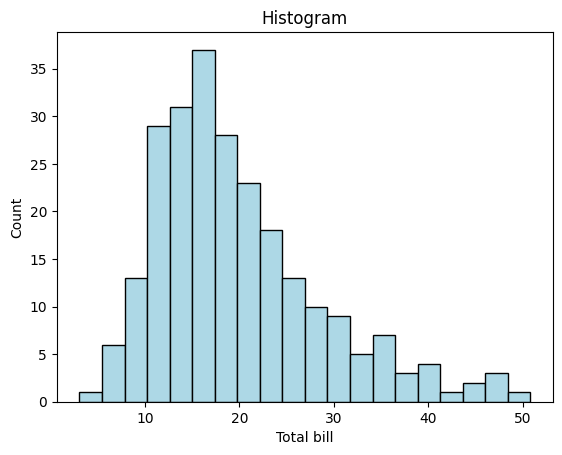

In [11]:
# 1. figure 생성. 2. subplot 1개 생성. 3. hisrogram 그림.
plt.hist(x=tips.total_bill , color='lightblue', edgecolor='black', bins=20)

# 4. 옵션 설정
plt.xlabel('Total bill')
plt.ylabel('Count')
plt.title('Histogram')

# 5. 보여주기
plt.show()

## Box plot(상자 그림)

숫자 타입 변수(컬럼)의 기술 통계량(최솟값, 25%, 50%, 75%, 최댓값)을 상자 모양으로 시각화.

In [12]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

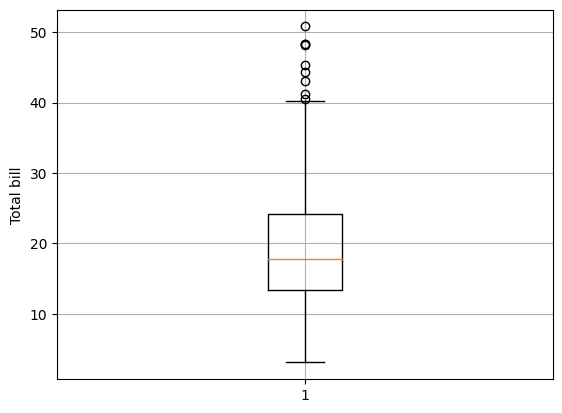

In [13]:
plt.boxplot(x=tips.total_bill)

plt.grid()
plt.ylabel('Total bill')

plt.show()


In [14]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

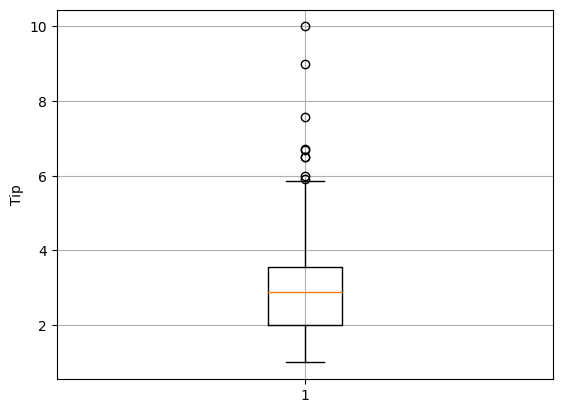

In [58]:
plt.boxplot(x=tips.tip)
plt.grid()
plt.ylabel('Tip')
plt.show()

## Bar plot(막대 그래프)

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프.

In [16]:
gender_count = tips.sex.value_counts()
gender_count

Male      157
Female     87
Name: sex, dtype: int64

In [17]:
type(gender_count)

pandas.core.series.Series

In [18]:
gender_count.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')

In [19]:
gender_count.values

array([157,  87])

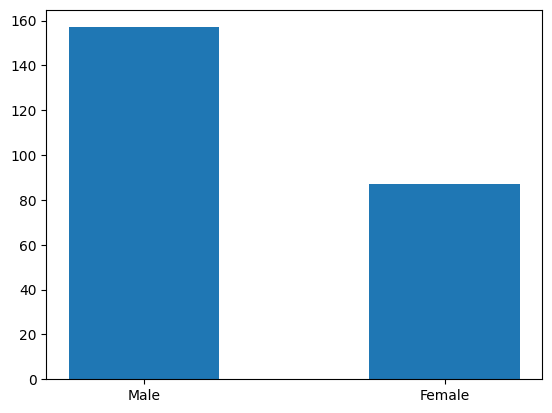

In [59]:
# 세로 막대 그래프(vertical bar plot)
# x: 인덱스, height: 막대 높이. 빈도수.
plt.bar(x=gender_count.index, height=gender_count.values, width=0.5)

plt.show()

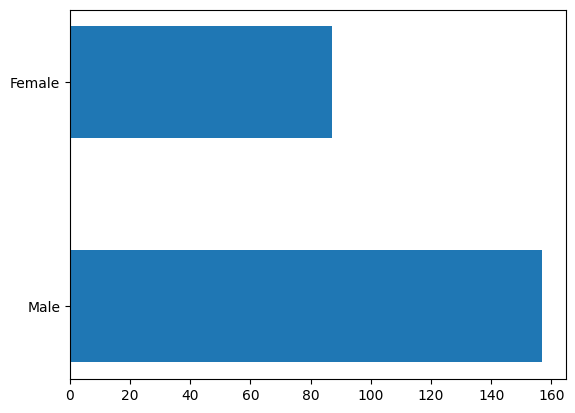

In [21]:
# 가로 막대 그래프(horizontal bar gragh)
plt.barh(y=gender_count.index, width=gender_count.values, height=0.5)

plt.show()

### Ex1. 요일 빈도수 막대 그래프
* 가로 막대 그래프
* 세로 막대 그래프

In [22]:
day_count = tips.day.value_counts()
day_count

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [23]:
type(day_count)

pandas.core.series.Series

In [24]:
day_count.index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

In [25]:
day_count.values

array([87, 76, 62, 19])

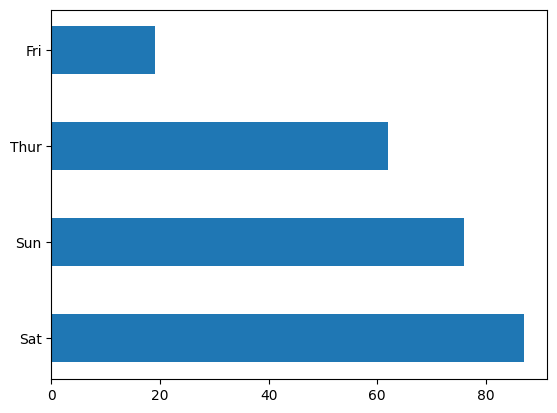

In [48]:
# 가로 막대 그래프(horizontal bar gragh)
plt.barh(y=day_count.index, width=day_count.values, height=0.5)

plt.show()

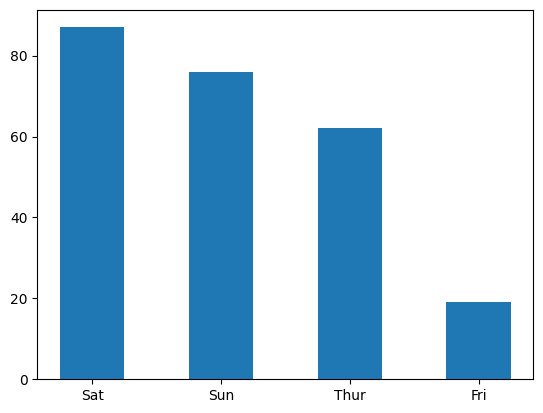

In [49]:
# 세로 막대 그래프(vertical bar plot)
# x: 인덱스, height: 막대 높이. 빈도수.
plt.bar(x=day_count.index, height=day_count.values, width=0.5)

plt.show()

###Ex2. 흡연여부 빈도수 막대 그래프

* 가로 막대 그래프
* 세로 막대 그래프

In [28]:
smoker_count = tips.smoker.value_counts()
smoker_count

No     151
Yes     93
Name: smoker, dtype: int64

In [29]:
type(smoker_count)

pandas.core.series.Series

In [30]:
smoker_count.index

CategoricalIndex(['No', 'Yes'], categories=['Yes', 'No'], ordered=False, dtype='category')

In [31]:
smoker_count.values

array([151,  93])

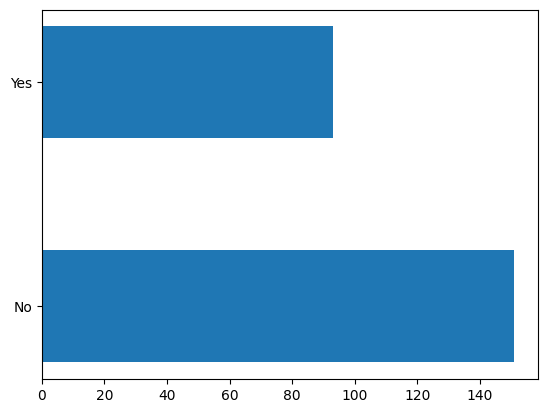

In [50]:
# 가로 막대 그래프(horizontal bar gragh)
plt.barh(y=smoker_count.index, width=smoker_count.values, height=0.5)

plt.show()

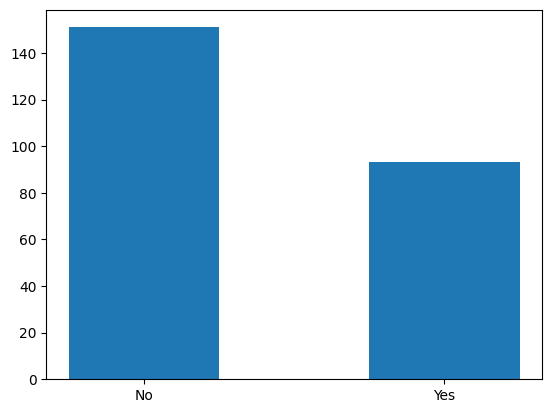

In [51]:
# 세로 막대 그래프(vertical bar plot)
# x: 인덱스, height: 막대 높이. 빈도수.
plt.bar(x=smoker_count.index, height=smoker_count.values, width=0.5)

plt.show()

###Ex3. 식사 인원 빈도수 막대(가로/세로)그래프

In [34]:
size_count = tips['size'].value_counts()
size_count

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [35]:
type(size_count)

pandas.core.series.Series

In [36]:
size_count.index

Int64Index([2, 3, 4, 5, 1, 6], dtype='int64')

In [37]:
size_count.values

array([156,  38,  37,   5,   4,   4])

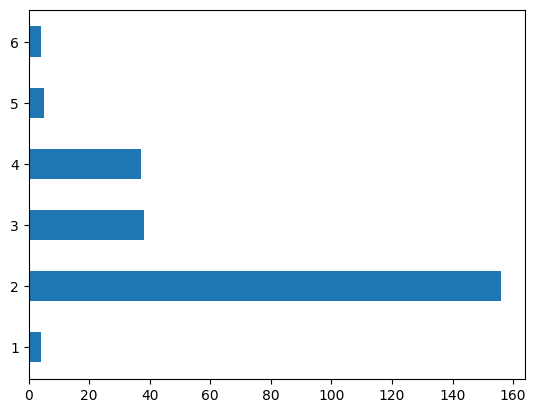

In [52]:
# 가로 막대 그래프(horizontal bar gragh)
plt.barh(y=size_count.index, width=size_count.values, height=0.5)

plt.show()

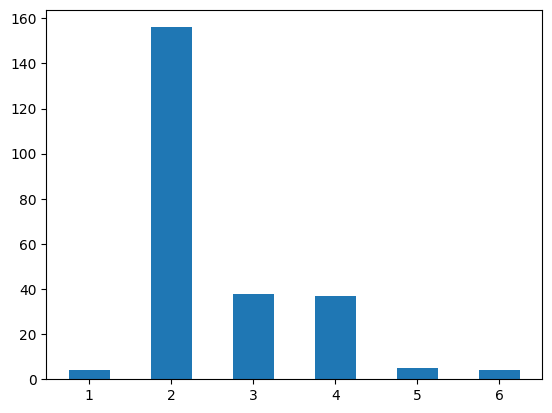

In [53]:
# 세로 막대 그래프(vertical bar plot)
# x: 인덱스, height: 막대 높이. 빈도수.
plt.bar(x=size_count.index, height=size_count.values, width=0.5)

plt.show()

###Ex4. 성별 tip의 box plot을 하나의 subplot에 그리기.

In [62]:
tip_male = tips[tips.sex == 'Male'].tip
tip_female = tips[tips.sex == 'Female'].tip

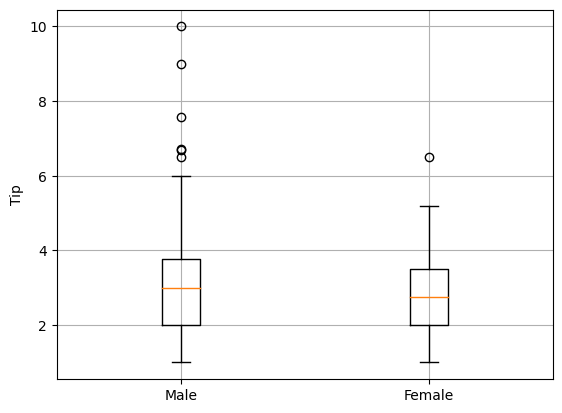

In [66]:
plt.boxplot(x=[tip_male,tip_female],
            labels=['Male','Female'])
plt.ylabel('Tip')
plt.grid()

plt.show()

In [40]:
tips.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

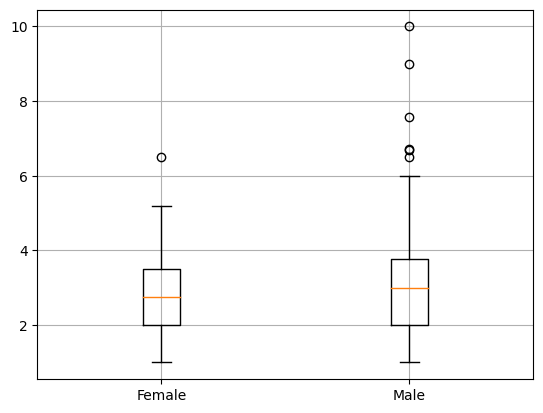

In [54]:
sex = tips['sex'].unique()
tip=[]

for x in sex:
    tip.append(tips[tips['sex'] == x].tip)

plt.boxplot(x=tip, labels=sex)

plt.grid()

plt.show()

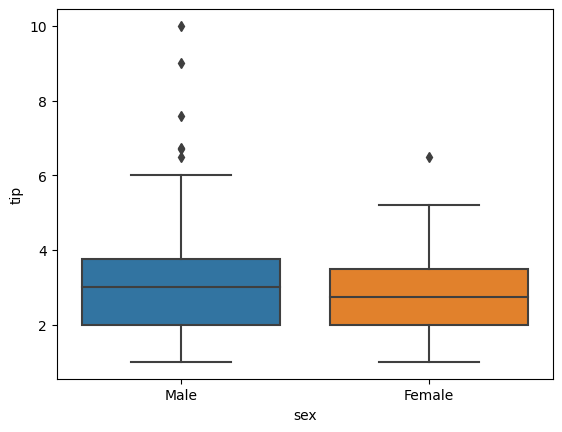

In [42]:

# Grouped boxplots by seaborn

import seaborn as sns



sns.boxplot(x="sex",

            y="tip",

            data=tips)

plt.show()

###Ex5. 시간별 tip의 box plot을 하나의 subplot에 그리기.

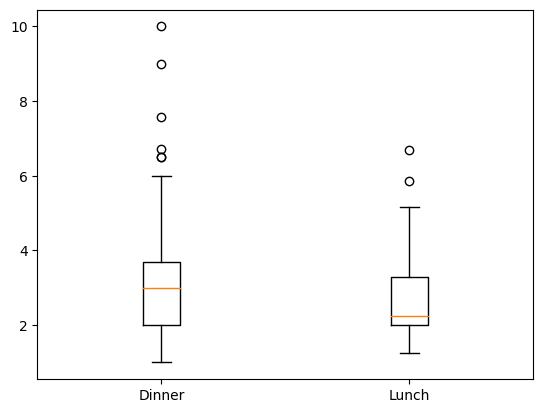

In [68]:
times = tips.time.unique()
tip_by_time = [] # Lunch, Dinner 부분집합에서 tip 컬럼을 저장하기 위한 리스트
for x in times:
    subset = tips[tips.time == x].tip
    tip_by_time.append(subset)

plt.boxplot(x=tip_by_time, labels=times)
plt.show()

In [43]:
tips.time.describe()

count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

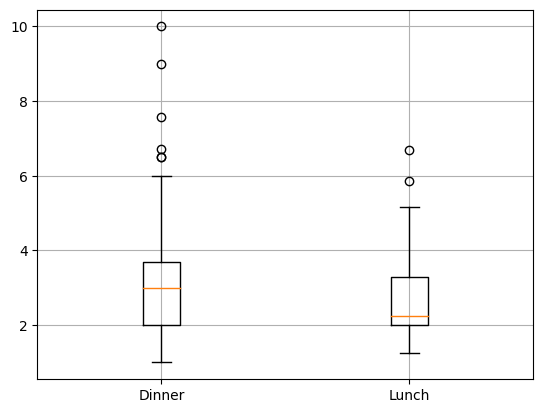

In [55]:
time = tips['time'].unique()
tip=[]

for x in time:
    tip.append(tips[tips['time'] == x].tip)

plt.boxplot(x=tip, labels=time)

plt.grid()

plt.show()

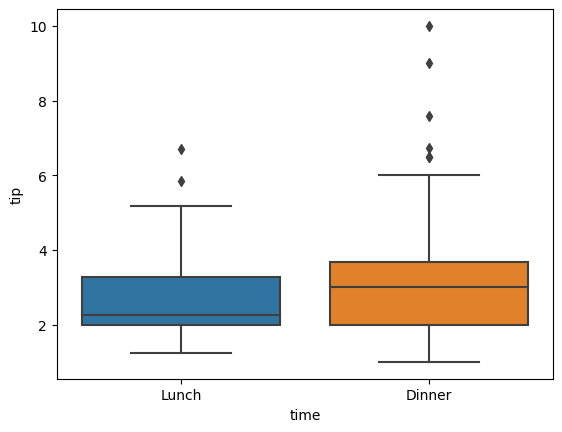

In [45]:
# Grouped boxplots by seaborn

import seaborn as sns



sns.boxplot(x="time",

            y="tip",

            data=tips)

plt.show()

###Ex6. 요일별 tip의 box plot을 하나의 subplot에 그리기.

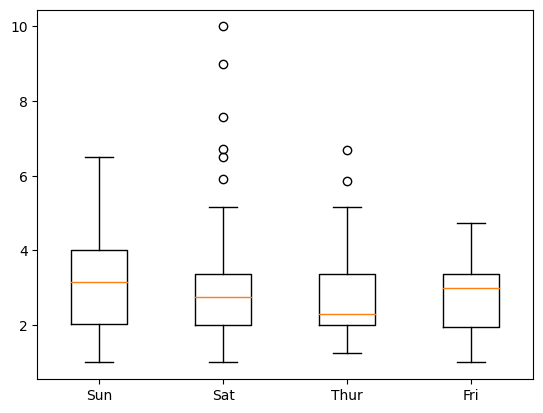

In [70]:
days = tips.day.unique()
tip_by_day = [tips[tips.day == x].tip for x in days]

plt.boxplot(x=tip_by_day, labels= day)
plt.show()

In [46]:
tips.day.describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

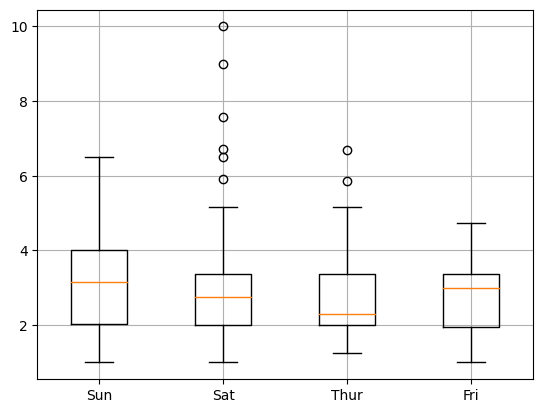

In [56]:
day = tips['day'].unique()
tip=[]

for x in day:
    tip.append(tips[tips['day'] == x].tip)

plt.boxplot(x=tip, labels=day)

plt.grid()

plt.show()

## 산점도(Scatter plot)

두 변수(컬럼) 사이의 상관관계를 파악하기 위해서 사용.

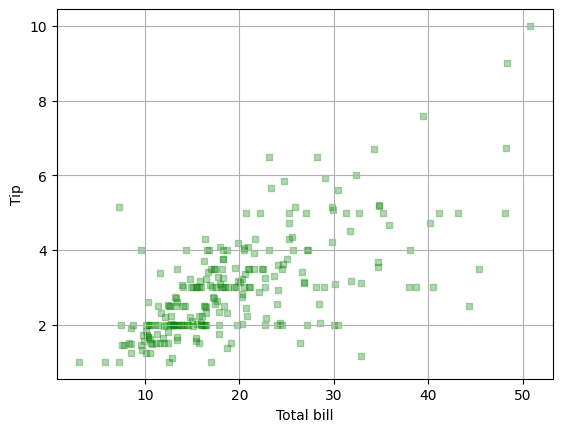

In [89]:
# tip ~ total_bill 상관관계
plt.scatter(x=tips.total_bill, y=tips.tip,
            alpha=0.3,      # alpha: 0(투명) ~ 1.0(불투명)
            s=20,           # s : size. 마커(점)의 크기.
            c='green',      # c : color. 마커의 색깔
            marker='s')     # marker : 마커의 종류(모양). 'o', '^', 'v', '*', 's',...

plt.grid()
plt.xlabel('Total bill')
plt.ylabel('Tip')

plt.show()

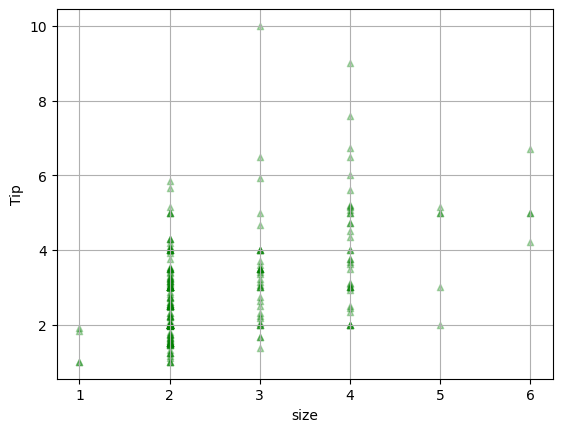

In [101]:
# tip ~ size 상관 관계
plt.scatter(x=tips['size'], y=tips.tip,
            alpha=0.3,      # alpha: 0(투명) ~ 1.0(불투명)
            s=20,           # s : size. 마커(점)의 크기.
            c='green',      # c : color. 마커의 색깔
            marker='^')     # marker : 마커의 종류(모양). 'o', '^', 'v', '*', 's',...

plt.grid()
plt.xlabel('size')
plt.ylabel('Tip')

plt.show()

## 선 그래프(Line plot)

주로 시계열 데이터(시간에 따라서 변하는 데이터: 주가, 환율, 날씨,...)를 시각화

In [106]:
np.random.seed(1) # 난수 생성하는 순서
df = pd.DataFrame(data={
    'time' : np.arange(1,11), # [1,2,3, ...9,10]
    'price' : np.random.rand(10) # (0, 1.0) 범위의 난수 10개를 갖는 1차원 배열
})

df

,time,price
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


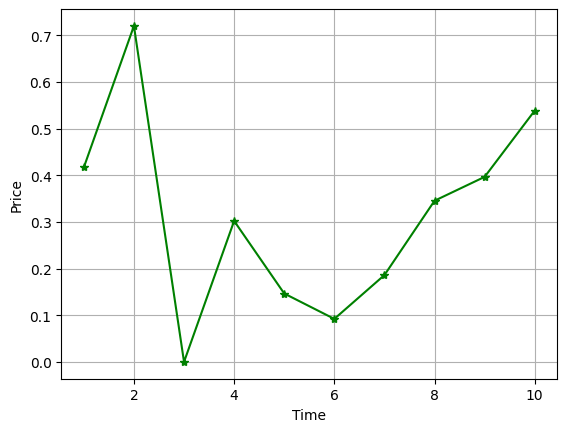

In [122]:
# price ~ time
plt.plot(df.time, df.price, 'g*-')
# format 문자열(3번째 arg): 색깔, 마커모양, 선의 종류
# 색깔: b(lue), r(ed), g(reen), (blac)k,...
# 마커 종류: o, ^, v, *, s, +, ...
# 선 종류: -(solid line), :(dotted line), --(dashed line),...

plt.grid()
plt.xlabel('Time')
plt.ylabel('Price')

plt.show()

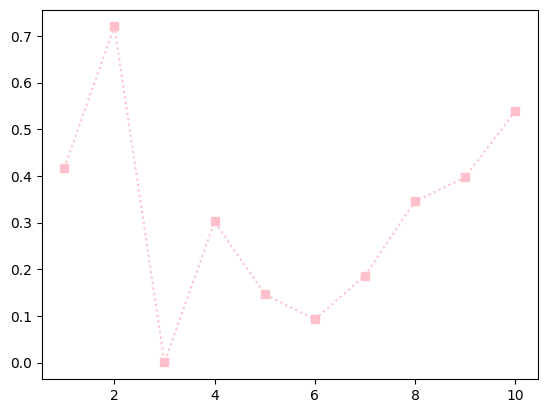

In [128]:
# variable-length keyword argument(**kwargs) 사용 방법:
plt.plot(df.time, df.price,
         c='pink',      # color
         marker='s',    # marker
         linestyle='dotted' # line style
         )

plt.show()

In [130]:
np.random.seed(1)
df = pd.DataFrame(data={
    'time' : np.arange(1,11),
    'price1' : np.random.rand(10),
    'price2' : np.random.rand(10),
    'price3' : np.random.rand(10),
})
df

,time,price1,price2,price3
0,1,0.417022,0.419195,0.800745
1,2,0.720324,0.685220,0.968262
2,3,0.000114,0.204452,0.313424
3,4,0.302333,0.878117,0.692323
4,5,0.146756,0.027388,0.876389
5,6,0.092339,0.670468,0.894607
6,7,0.186260,0.417305,0.085044
7,8,0.345561,0.558690,0.039055
8,9,0.396767,0.140387,0.169830
9,10,0.538817,0.198101,0.878143


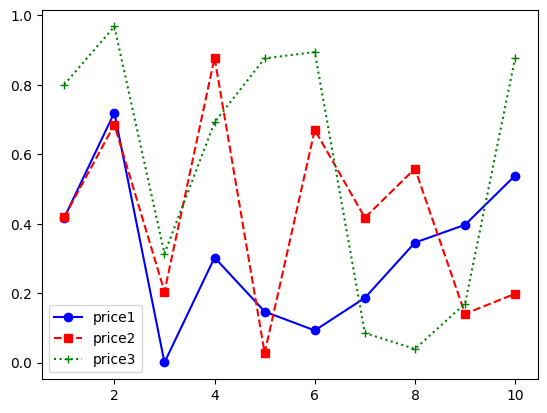

In [140]:
# price1 ~ time
plt.plot(df.time, df.price1, 'bo-' ,label='price1')
plt.plot(df.time, df.price2, 'rs--' ,label='price2')
plt.plot(df.time, df.price3, 'g+:' ,label='price3')

plt.legend() # 범례(legend) 표시

plt.show()

# 연습문제

## Ex 1.

*  4개의 subplot을 2x2 모양으로 배치.
*  4개의 subplot에 각각 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 그래프를 그리세요.


In [141]:
# bar plot을 그리기 위한 데이터
genger_count = tips.sex.value_counts()
smoker_count = tips.smoker.value_counts()
day_count = tips.day.value_counts()
time_count = tips.time.value_counts()

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


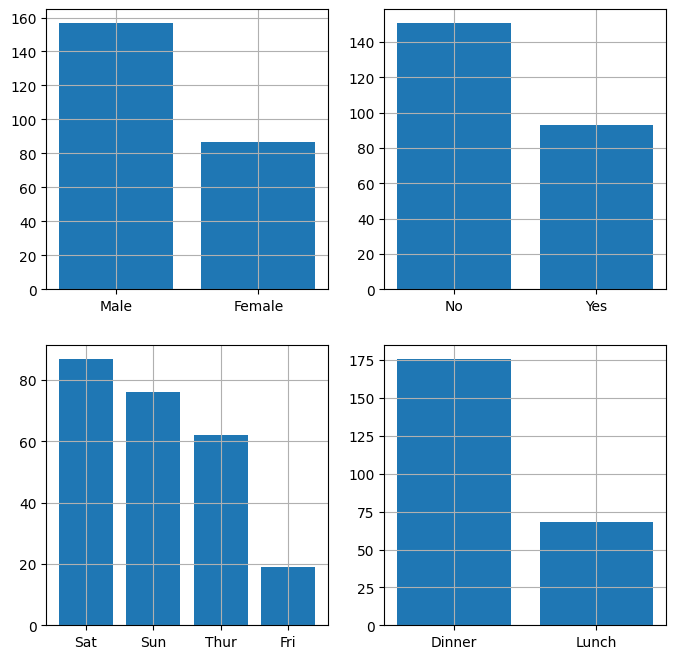

In [154]:
# 2x2 모양의 subplot들을 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

print(ax)

ax[0, 0].bar(x=gender_count.index, height=gender_count.values)
ax[0, 1].bar(x=smoker_count.index, height=smoker_count.values)
ax[1, 0].bar(x=day_count.index, height=day_count.values)
ax[1, 1].bar(x=time_count.index, height=time_count.values)

for i in range(2):
    for j in range(2):
        ax[i,j].grid()

plt.show()

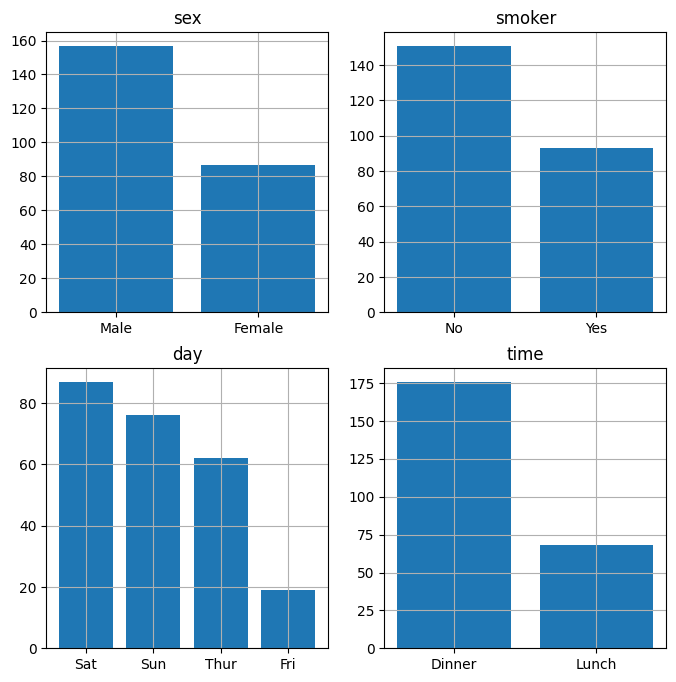

In [153]:
categories = ['sex', 'smoker', 'day', 'time']
counts = [tips[x].value_counts() for x in categories]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i  in range(2):
    for j in range(2):
        idx = i * 2 + j
        ax[i,j].bar(x=counts[idx].index, height=counts[idx].values)
        ax[i,j].grid()
        ax[i,j].set_title(categories[idx])
plt.show()

## Ex 2.

*  `tip ~ total_bill`의 상관관계를 scatter plot으로 그리세요.
*  성별로 점의 색깔을 다르게 표현하세요.
*  범례를 표시.


In [157]:
tip_male = tips[tips.sex == 'Male'] # 남성 부분집합
tip_female = tips[tips.sex == 'Female'] # 여성 부분집합

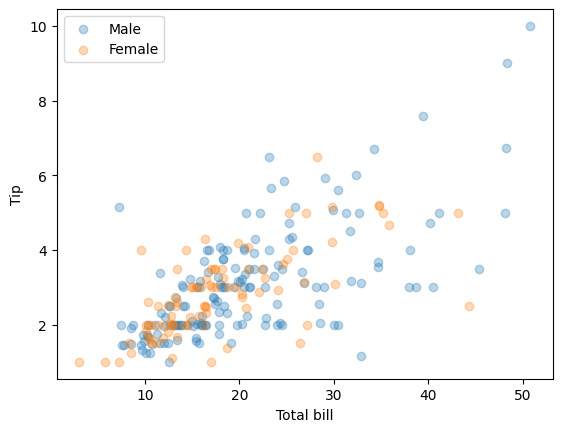

In [161]:
# tip_male에서 tip ~ total_bill 선점도
plt.scatter(x=tip_male.total_bill, y=tip_male.tip, alpha=0.3, label='Male')

# tip_female에서 tip ~ total_bill 선점도
plt.scatter(x=tip_female.total_bill, y=tip_female.tip, alpha=0.3, label='Female')

plt.legend()
plt.xlabel('Total bill')
plt.ylabel('Tip')

plt.show()

## Ex 3.

*  `tip ~ total_bill`의 상관관계를 scatter plot으로 그리세요.
*  요일별로 점의 색깔, 모양을 다르게 표현하세요.
*  범례를 표시.


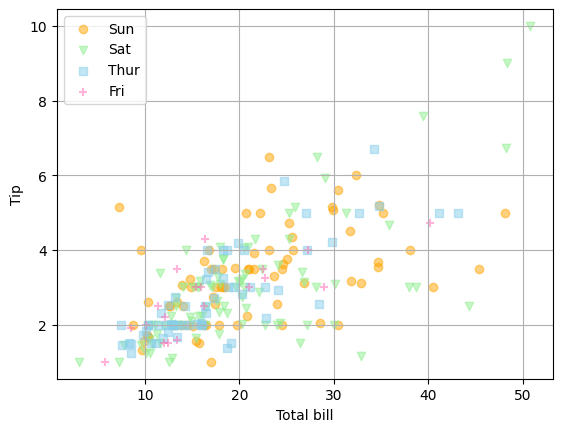

In [173]:
days = tips.day.unique()
markers = ['o', 'v', 's', '+']
colors = ['orange', 'lightgreen','skyblue','hotpink']

for d,m,c in zip(days,markers,colors):
    subset = tips[tips.day == d]
    plt.scatter(x=subset.total_bill, y=subset.tip, c=c, marker=m,
                alpha=0.5, label=d)

plt.legend()
plt.grid()
plt.xlabel('Total bill')
plt.ylabel('Tip')

plt.show()